# Summary

A natural language processing project was conducted to gauge sentiment from user reviews of a restaurant. The Logistic Regression, K-Nearest Neighbors, Support Vector Machine, Gaussian Naïve Bayes, and Random Forest classifiers from Scikit-Learn were trained and tested on a total of 1,000 reviews of various sentiment.

The Logistic Regression classifier reached an accuracy of ~82% and was the the most accurate out of the five classifiers that were tested in for this project.

# Data preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string

import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\toshe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#Import the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
def CleanText(list_of_words):
    corpus = []
    for i in range(0, len(list_of_words)):
        #Replace characters that are not letters with a space
        review=[char for char in list_of_words[i] if char not in string.punctuation]
        review=''.join(review)
        #Change to all lowercase letters
        review = review.lower()
        review = review.split()
        #Perform stemming
        ps = PorterStemmer()
        all_stopwords = stopwords.words('english')
        #Removing specific stop words that may help us determine user sentiment
        all_stopwords.remove('not')
        all_stopwords.remove('isn')
        all_stopwords.remove('doesn')
        review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
        #Rejoin as a string
        review = ' '.join(review)
        corpus.append(review)
    return corpus

In [4]:
corpus = CleanText(dataset.iloc[:,0])
corpus[:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

# Building, training, and evaluating the model

In [5]:
#Creating the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500, min_df=2)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:,-1].values

In [6]:
#Splitting the dataset into the training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
def Confused(y_test, y_pred):
    #Showing the confusion matrix and accuracy score
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=cm, fmt='', cbar=False, cmap='Blues')
    print (accuracy_score(y_test, y_pred))

## Logistic Regression

0.815


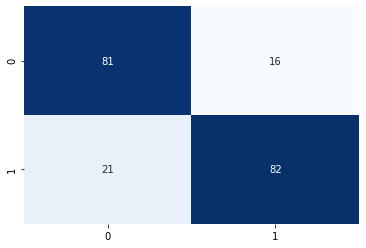

In [8]:
#Training the logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(random_state = 0)
lr_classifier.fit(X_train, y_train)
#Confusion matrix and accuracy score
Confused(y_test,lr_classifier.predict(X_test))

## K-Nearest Neighbors

0.66


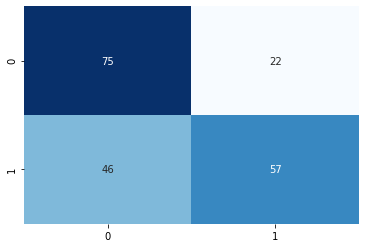

In [9]:
#Training the KNN model on the training set
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)
#Confusion matrix and accuracy score
Confused(y_test,knn_classifier.predict(X_test))

## Support Vector Machine

0.79


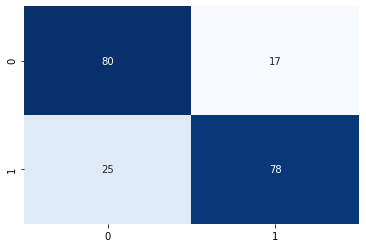

In [10]:
#Training the svm model on the training set
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear', random_state=0)
svm_classifier.fit(X_train, y_train)
#Confusion matrix and accuracy score
Confused(y_test,svm_classifier.predict(X_test))

## Naive Bayes

0.735


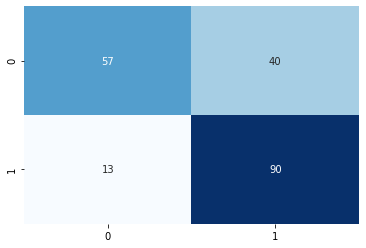

In [11]:
#Training with Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
#Confusion matrix and accuracy score
Confused(y_test,nb_classifier.predict(X_test))

## Random Forest

0.75


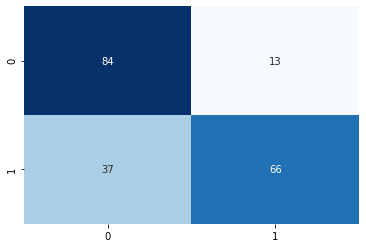

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0, n_jobs=-1, min_samples_leaf=5)
rf_classifier.fit(X_train, y_train)
#Confusion matrix and accuracy score
Confused(y_test,rf_classifier.predict(X_test))

In [13]:
#Making a single prediction using logistic regression
single_review = 'the food does not taste good'
cleaned = CleanText([single_review])
print ('Text transformation: %s' % cleaned)
lr_classifier.predict(cv.transform(cleaned).toarray())

Text transformation: ['food not tast good']


array([0], dtype=int64)

The single prediction predicted that the user did not like the food at the restaurant